### Experiment - 7 | Huffman Coding
****
**EC39004: Digital Communication Laboratory** <br>
Irsh Vijay (Group 27)

In [1]:
from utils import *
%matplotlib inline

**Reading in the image**

In [2]:
FILEPATH = "tt.jpeg"
image = read_img(FILEPATH)

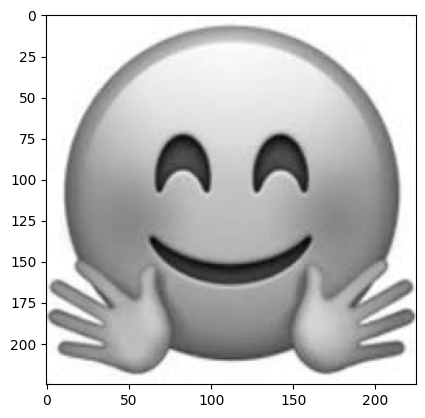

In [3]:
plt.imshow(image, cmap="gray")
plt.show()

**Generating Huffman Code**

In [4]:
transmitted = huffmanenco(image)

In [5]:
sins, phase = bpsk_modulation(transmitted)

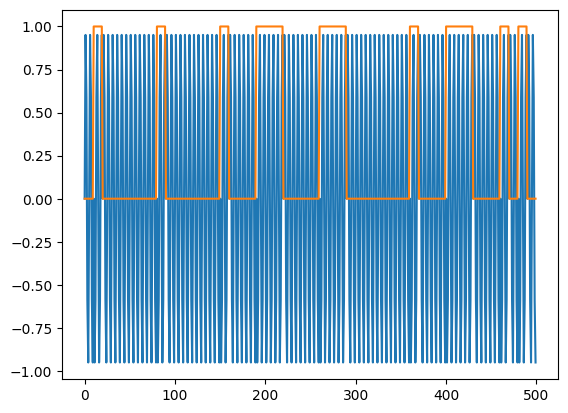

In [6]:
plt.plot(sins[306500:307000])
plt.plot(phase[306500:307000]//np.pi)
plt.show()

In [7]:
import scipy.io.wavfile
AMP = np.iinfo(np.int16).max
scipy.io.wavfile.write("exp7.wav", 5000, (AMP*sins).astype(np.int16))

### On To Decoding

In [8]:
from scipy.io import wavfile
samplerate, data = wavfile.read('exp7.wav')

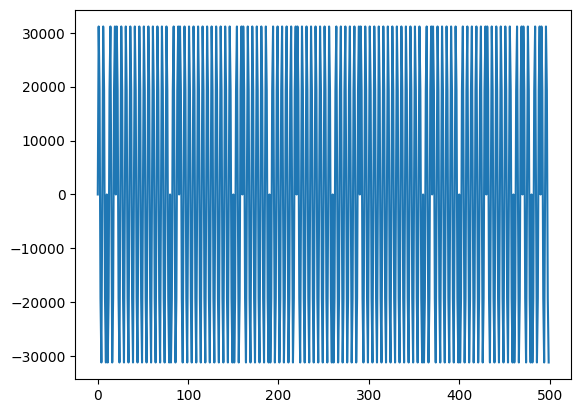

In [9]:
plt.plot(data[306500:307000])
plt.show()

#### Adding AWGN

In [10]:
SNR = 0.2
gaussian_noise = get_awgn(data, SNR)

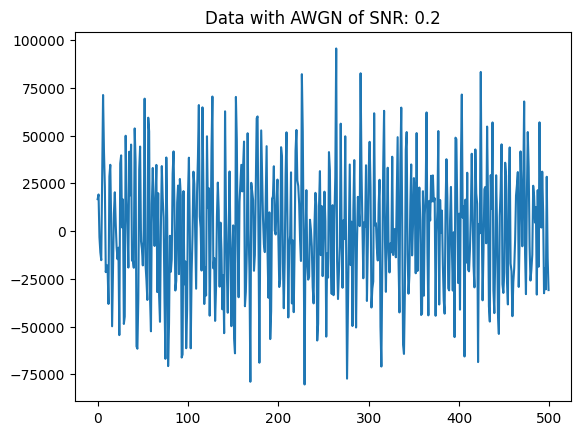

In [11]:
data_g=data+gaussian_noise

plt.title(f"Data with AWGN of SNR: {SNR}")
plt.plot(data_g[306500:307000])
plt.show()

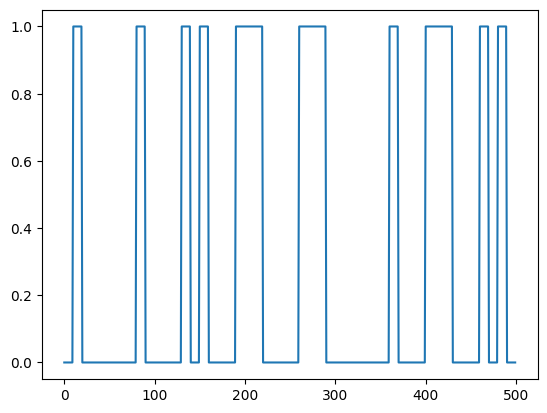

In [12]:
fs = 5e3
fc = 1e3
samples_per_symbol = 10
make_plot = (306500, 307000)

bits = channel_decoder(data_g, fs, fc, samples_per_symbol, make_plot = make_plot)

In [13]:
get_bit_error_rate(bits, transmitted) * 100

5.611867073960937

In [14]:
assert len(bits) == len(transmitted), "Length Mismatch"

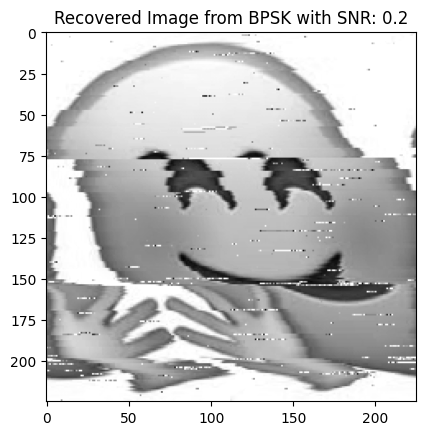

In [15]:
recovered_img = decoder(bits, image.shape[0], image.shape[1])

plt.title(f"Recovered Image from BPSK with SNR: {SNR}")
plt.imshow(recovered_img, cmap = "gray")
plt.show()

#### Bit Error Rate vs SNR

In [16]:
from tqdm.auto import tqdm

SNRs = [-6, -5, -4, -3, -2, -1, 0, 1, 2]

  0%|          | 0/9 [00:00<?, ?it/s]

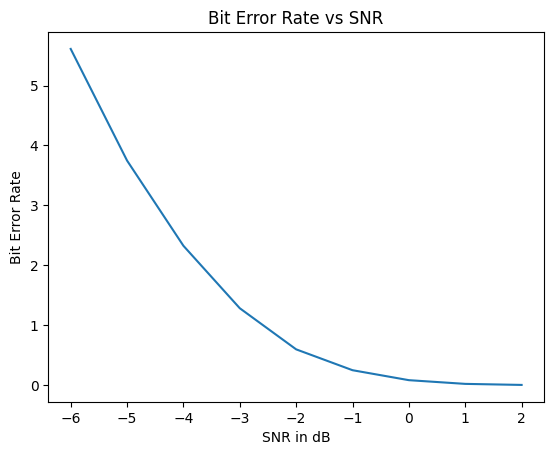

In [17]:
errors = []

for SNR in tqdm(SNRs):
    gaussian_noise = get_awgn(data, SNR)
    data_g=data+gaussian_noise

    fs = 5e3
    fc = 1e3
    samples_per_symbol = 10

    bits = channel_decoder(data_g, fs, fc, samples_per_symbol)

    errors.append(get_bit_error_rate(bits, transmitted))
    
plt.plot(SNRs, errors)
plt.title('Bit Error Rate vs SNR')
plt.xlabel('SNR in dB')
plt.ylabel('Bit Error Rate')
plt.show()

### Transmitting Random Bits

In [24]:
SNRs = [-6, -5, -4, -3, -2, -1, 0, 1, 2]
lengths = [10, 100, 1e3, 1e4, 1e5]
errors = {l: {} for l in lengths}

for length in lengths:
    transmitted = ''.join(list((np.random.randn(int(length)) > 0.5).astype(int).astype(str)))
    sins, phase = bpsk_modulation(transmitted)
    AMP = np.iinfo(np.int16).max
    data = (AMP * sins).astype(np.int16)
    
    for SNR in tqdm(SNRs):
        gaussian_noise = get_awgn(data, SNR)
        data_g=data+gaussian_noise

        fs = 5e3
        fc = 1e3
        samples_per_symbol = 10

        bits = channel_decoder(data_g, fs, fc, samples_per_symbol)

        errors[length][SNR] = get_bit_error_rate(bits, transmitted)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

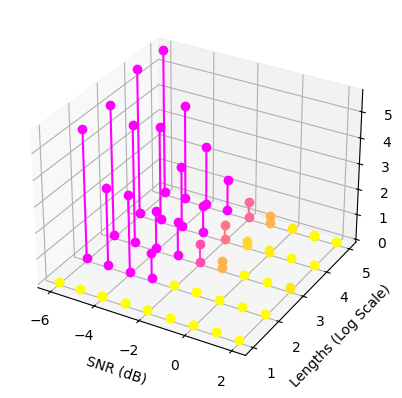

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for key, values in errors.items():
    for subkey, value in values.items():
        x = subkey
        y = np.log10(key)
        z = value
        ax.plot([x, x], [y, y], [0, z], marker='o', color=plt.cm.spring_r(z))

ax.set_xlabel('SNR (dB)')
ax.set_ylabel('Lengths (Log Scale)')
ax.set_zlabel('Bit Error Rate')

plt.show()

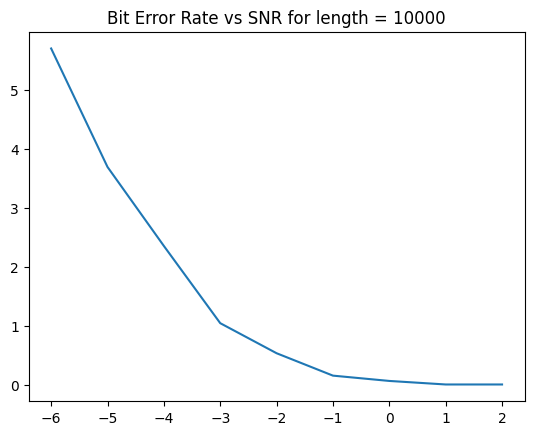

In [31]:
plt.plot([x for x in errors[10000].keys()], errors[10000].values())
plt.title(f"Bit Error Rate vs SNR for length = {10000}")
plt.show()